In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/ga-students/SF-DAT-20/master/Data/Tobacco.csv"
TobaccoData = pd.read_csv(url)

In [3]:
TobaccoData.head()

,Unnamed: 0,occupation,region,nkids,nkids2,nadults,lnx,stobacco,salcohol,age
0,1,bluecol,flanders,1,0,2,14.19054,0,0.000000,2
1,2,inactself,flanders,0,0,3,13.90857,0,0.002285,3
2,3,whitecol,flanders,0,0,1,13.97461,0,0.012875,2
3,4,bluecol,flanders,1,0,2,13.76281,0,0.005907,2
4,5,inactself,flanders,2,0,1,13.80800,0,0.021981,2


In [4]:
del TobaccoData['Unnamed: 0']
TobaccoData.head()

,occupation,region,nkids,nkids2,nadults,lnx,stobacco,salcohol,age
0,bluecol,flanders,1,0,2,14.19054,0,0.000000,2
1,inactself,flanders,0,0,3,13.90857,0,0.002285,3
2,whitecol,flanders,0,0,1,13.97461,0,0.012875,2
3,bluecol,flanders,1,0,2,13.76281,0,0.005907,2
4,inactself,flanders,2,0,1,13.80800,0,0.021981,2


Here is the data dictionary of this dataset:
https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Tobacco.html

In [5]:
region_dummy  = pd.get_dummies(TobaccoData['region'], prefix = 'region')
del region_dummy['region_flanders']

occupation_dummy = pd.get_dummies(TobaccoData['occupation'], prefix = 'occupation')
del occupation_dummy['occupation_inactself']

age_dummy = pd.get_dummies(TobaccoData['age'], prefix = 'age')
del age_dummy['age_0']

TobaccoData = pd.concat([TobaccoData,region_dummy ,occupation_dummy, age_dummy], axis=1)
for i in ['occupation','region','age']:
    del TobaccoData[i]
TobaccoData.head()

,nkids,nkids2,nadults,lnx,stobacco,salcohol,region_brussels,region_walloon,occupation_bluecol,occupation_whitecol,age_1,age_2,age_3,age_4
0,1,0,2,14.19054,0,0.000000,0,0,1,0,0,1,0,0
1,0,0,3,13.90857,0,0.002285,0,0,0,0,0,0,1,0
2,0,0,1,13.97461,0,0.012875,0,0,0,1,0,1,0,0
3,1,0,2,13.76281,0,0.005907,0,0,1,0,0,1,0,0
4,2,0,1,13.80800,0,0.021981,0,0,0,0,0,1,0,0


#### We would like to use a Decision Tree Regression model to detect the most important variables that affect expenditure on tobacco. Please follow necessary steps to develop your Regression Tree, tune it via Cross-Validation and lastly state the most important variables you found with the corresponding MSE of your best model. Your output is stobacco

In [31]:
X = TobaccoData.copy()
del X['lnx']
y = TobaccoData['lnx'].copy()

    cv_scores  depth
0    0.406893      1
1    0.388836      2
2    0.383778      3
3    0.376797      4
4    0.376835      5
5    0.376509      6
6    0.384326      7
7    0.395072      8
8    0.412172      9
9    0.429053     10
10   0.441848     11
11   0.450185     12
12   0.465356     13
13   0.473151     14
14   0.476620     15
15   0.484640     16
16   0.491759     17
17   0.491663     18
18   0.493877     19
19   0.499231     20
20   0.501428     21
21   0.503454     22
22   0.502482     23
23   0.501855     24
24   0.502145     25
25   0.501285     26
26   0.507252     27
27   0.507992     28
28   0.508645     29
29   0.507530     30
30   0.505012     31
31   0.503838     32
32   0.504669     33
33   0.503176     34
34   0.507164     35
35   0.506826     36
36   0.508024     37
37   0.504367     38
38   0.506785     39
39   0.507592     40
40   0.508031     41
41   0.508025     42
42   0.505858     43
43   0.506888     44
44   0.504958     45
45   0.506630     46
46   0.504327

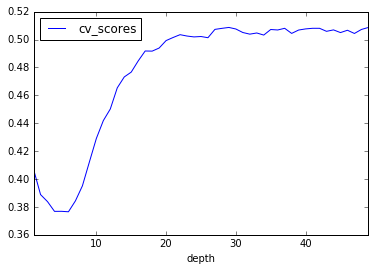

In [12]:
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeRegressor

depth_range = range(1,50)
cv_scores = []
for i in depth_range:
    treereg = DecisionTreeRegressor(max_depth=i)
    cv_error = cross_val_score(treereg,X,y,cv=10,scoring='mean_squared_error')
    cv_scores.append(np.mean(np.sqrt(-cv_error)))

depth_df = pd.DataFrame({'depth':depth_range,'cv_scores':cv_scores})
print depth_df
depth_df.plot(x='depth',y='cv_scores')

Depth of 4 appears to be ideal

In [15]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
treereg = DecisionTreeRegressor(max_depth=4)
treereg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [16]:
predictions = treereg.predict(X_test)
np.sqrt(mean_squared_error(y_test,predictions))

0.38989138659914091

In [17]:
zip(X.columns.values,treereg.feature_importances_)


[('nkids', 0.019632664289550381),
 ('nkids2', 0.0),
 ('nadults', 0.66619613097891872),
 ('stobacco', 0.0724969334715172),
 ('salcohol', 0.039688082673349258),
 ('region_brussels', 0.0),
 ('region_walloon', 0.0),
 ('occupation_bluecol', 0.0),
 ('occupation_whitecol', 0.17230697177692419),
 ('age_1', 0.0),
 ('age_2', 0.0),
 ('age_3', 0.0),
 ('age_4', 0.029679216809740155)]

Explain your findings: nadults and occupation_whitecol are the most used features in the tree, while many features, including nkids2, region_brussels, region_walloon, occupation_bluecol, age_1, age_2, age_3

#### Now, let's treat stobacco as a dummy variable to distinguish between those who smoke and who do not. We then need to use decision tree classifier to identify the most important features that may affect probability of smoking.

In [18]:
TobaccoData['smoke'] = '1'
mask_cat0 = (TobaccoData['stobacco'] == 0)   

TobaccoData.loc[mask_cat0,'smoke'] = '0'
del TobaccoData['stobacco']
TobaccoData.head()

,nkids,nkids2,nadults,lnx,salcohol,region_brussels,region_walloon,occupation_bluecol,occupation_whitecol,age_1,age_2,age_3,age_4,smoke
0,1,0,2,14.19054,0.000000,0,0,1,0,0,1,0,0,0
1,0,0,3,13.90857,0.002285,0,0,0,0,0,0,1,0,0
2,0,0,1,13.97461,0.012875,0,0,0,1,0,1,0,0,0
3,1,0,2,13.76281,0.005907,0,0,1,0,0,1,0,0,0
4,2,0,1,13.80800,0.021981,0,0,0,0,0,1,0,0,0


In [19]:
X = TobaccoData.copy()
del X['smoke']
y = TobaccoData['smoke'].copy()

    cv_scores  depth
0    0.619679      1
1    0.610452      2
2    0.617120      3
3    0.605744      4
4    0.602431      5
5    0.608298      6
6    0.598029      7
7    0.597284      8
8    0.589211      9
9    0.580362     10
10   0.573415     11
11   0.576724     12
12   0.580751     13
13   0.577460     14
14   0.577091     15
15   0.575982     16
16   0.572692     17
17   0.565706     18
18   0.566453     19
19   0.565720     20
20   0.566076     21
21   0.566448     22
22   0.562028     23
23   0.565341     24
24   0.565707     25
25   0.566825     26
26   0.568282     27
27   0.565342     28
28   0.563509     29
29   0.565714     30
30   0.566814     31
31   0.566084     32
32   0.567920     33
33   0.567176     34
34   0.567172     35
35   0.564251     36
36   0.564242     37
37   0.564246     38
38   0.567911     39
39   0.566454     40
40   0.565714     41
41   0.566804     42
42   0.563509     43
43   0.564235     44
44   0.563874     45
45   0.567553     46
46   0.564251

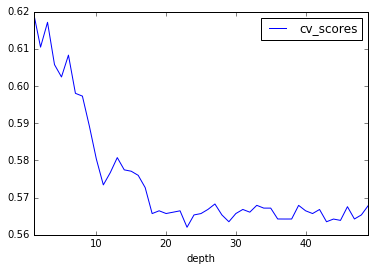

In [23]:
from sklearn.tree import DecisionTreeClassifier

depth_range = range(1,50)
cv_scores = []
for i in depth_range:
    treereg = DecisionTreeClassifier(max_depth=i,min_samples_leaf=5)
    cv_score = cross_val_score(treereg,X,y,cv=10)
    cv_scores.append(np.mean(cv_score))
    
depth_df = pd.DataFrame({'depth':depth_range,'cv_scores':cv_scores})
print depth_df
depth_df.plot(x='depth',y='cv_scores')

Depth of 1 appears to be ideal for this tree

In [25]:
treereg = DecisionTreeClassifier(max_depth=1,min_samples_leaf=5)
treereg.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [27]:
zip(X.columns.values,treereg.feature_importances_)

[('nkids', 0.0),
 ('nkids2', 0.0),
 ('nadults', 0.0),
 ('lnx', 0.0),
 ('salcohol', 0.0),
 ('region_brussels', 0.0),
 ('region_walloon', 0.0),
 ('occupation_bluecol', 0.0),
 ('occupation_whitecol', 0.0),
 ('age_1', 0.0),
 ('age_2', 0.0),
 ('age_3', 0.0),
 ('age_4', 1.0)]

The only feature that is used in this tree is age_4